# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Evan Hanif Widiatama
- **Email:** evan.hanif.77@gmail.com
- **ID Dicoding:** evanhanif

## Menentukan Pertanyaan Bisnis

- Bagaimana pola pembelian pelanggan berubah seiring waktu? Apakah terdapat tren musiman atau pola tertentu berdasarkan hari, bulan, atau tahun?
- Apakah metode pembayaran memiliki pengaruh terhadap jumlah uang yang dibelanjakan pelanggan? Jika ya, metode pembayaran mana yang cenderung digunakan untuk transaksi dengan nilai lebih tinggi?

## Import Semua Packages/Library yang Digunakan

Sebelum melakukan eksplorasi data, kita perlu mengimpor beberapa library utama yang digunakan dalam analisis:

- **`pandas`** digunakan untuk manipulasi data dalam bentuk DataFrame.
- **`numpy`** membantu dalam perhitungan numerik dan manipulasi array.
- **`seaborn`** digunakan untuk visualisasi data yang lebih menarik dan mudah dipahami.
- **`matplotlib.pyplot`** berfungsi untuk plotting data dasar.

Selain itu, terdapat beberapa konfigurasi tambahan:
- **`sns.set_style("whitegrid")`** → Mengatur tampilan grafik agar lebih mudah dibaca dengan latar belakang grid.
- **`pd.options.display.max_columns = None`** → Memastikan semua kolom ditampilkan saat kita menampilkan DataFrame di notebook.

Dengan konfigurasi ini, analisis data akan lebih terstruktur dan visualisasi menjadi lebih jelas.


In [1]:
# Import library yang diperlukan untuk analisis data dan visualisasi
import pandas as pd  # Manipulasi data dalam bentuk DataFrame
import numpy as np  # Operasi numerik dan manipulasi array
import seaborn as sns  # Visualisasi data yang lebih menarik
import matplotlib.pyplot as plt  # Plotting data dasar

# Konfigurasi tampilan dan visualisasi
sns.set_style("whitegrid")  # Mengatur style default seaborn dengan latar belakang grid
pd.options.display.max_columns = None  # Menampilkan semua kolom saat menampilkan DataFrame


## Data Wrangling

### Gathering Data

Kita mengimpor berbagai dataset yang terkait dengan sistem ecommerce. Setiap dataset memiliki perannya masing-masing:

- **`customers_dataset.csv`** → Berisi data pelanggan, seperti ID pelanggan dan lokasi mereka.
- **`geolocation_dataset.csv`** → Menyimpan data koordinat geografis yang mungkin digunakan untuk analisis lokasi.
- **`order_items_dataset.csv`** → Berisi detail produk dalam setiap pesanan.
- **`order_payments_dataset.csv`** → Menyimpan informasi metode pembayaran yang digunakan oleh pelanggan.
- **`order_reviews_dataset.csv`** → Berisi ulasan pelanggan terhadap pesanan mereka.
- **`orders_dataset.csv`** → Data utama yang mencatat setiap pesanan yang dibuat.
- **`product_category_name_translation.csv`** → Berisi terjemahan kategori produk.
- **`products_dataset.csv`** → Menyimpan informasi produk, seperti ID produk dan kategori.
- **`sellers_dataset.csv`** → Berisi informasi mengenai penjual.

Dengan membaca dataset ini ke dalam DataFrame `pandas`, kita dapat mulai melakukan eksplorasi dan analisis lebih lanjut terhadap data ecommerce.


In [2]:
# Membaca dataset dari file CSV ke dalam DataFrame pandas
customers = pd.read_csv("data/customers_dataset.csv")  # Data pelanggan
geolocation = pd.read_csv("data/geolocation_dataset.csv")  # Data lokasi geografis
order_items = pd.read_csv("data/order_items_dataset.csv")  # Data item pesanan
order_payments = pd.read_csv("data/order_payments_dataset.csv")  # Data pembayaran pesanan
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")  # Data ulasan pesanan
orders = pd.read_csv("data/orders_dataset.csv")  # Data pesanan
product_category = pd.read_csv("data/product_category_name_translation.csv")  # Kategori produk
products = pd.read_csv("data/products_dataset.csv")  # Data produk
sellers = pd.read_csv("data/sellers_dataset.csv")  # Data penjual


In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Terdapat 9 Tabel di Dataset ini

### Assessing Data

## **Inspeksi Dataframe Ecommerce**

Untuk memastikan kualitas data yang akan digunakan dalam analisis ecommerce, beberapa pemeriksaan dilakukan pada setiap dataset, yaitu:

1. **Cek Tipe Data**  
   Setiap dataset diperiksa untuk melihat tipe data di tiap kolomnya menggunakan `.info()`. Hal ini penting untuk memastikan bahwa tipe data sudah sesuai dengan analisis yang akan dilakukan.

   **Temuan:**  
   - Semua dataset memiliki tipe data yang sesuai dengan ekspektasi, seperti `object` untuk ID dan nama, serta `int64/float64` untuk nilai numerik.  
   - Pada dataset `order_items`, kolom `shipping_limit_date` masih berupa `object`, yang sebaiknya dikonversi menjadi tipe datetime untuk analisis waktu.

2. **Cek Missing Value**  
   Jumlah nilai yang hilang di setiap dataset diperiksa menggunakan `.isnull().sum()`.

   **Temuan:**  
   - Dataset **`order_reviews`** memiliki banyak missing value pada kolom `review_comment_title` dan `review_comment_message`.  
   - Dataset **`orders`** memiliki beberapa missing value di kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`.  
   - Dataset **`products`** memiliki beberapa missing value pada kolom terkait deskripsi produk.

3. **Cek Data Terdublikasi**  
   Duplikasi dalam dataset dicek menggunakan `.duplicated().sum()`.

   **Temuan:**  
   - Dataset **`geolocation`** memiliki **261,831 data duplikat**, yang mungkin perlu dibersihkan sebelum analisis lebih lanjut.

4. **Cek Nilai Tidak Wajar**  
   Ringkasan statistik data numerik diperiksa menggunakan `.describe()`.

   **Temuan:**  
   - Pada dataset **`products`**, terdapat produk dengan berat `0 gram`, yang mungkin merupakan anomali data.  
   - Pada dataset **`order_items`**, ada harga produk minimal `0.85`, yang mungkin perlu dianalisis apakah itu diskon atau kesalahan data.  
   - Pada dataset **`geolocation`**, koordinat lat/lng memiliki nilai yang masuk akal untuk lokasi di Brasil.

**Kesimpulan & Langkah Selanjutnya**  
Dari hasil inspeksi ini, langkah berikutnya yang perlu dilakukan:  
- **Menangani missing values**, terutama pada dataset `orders` dan `order_reviews`.  
- **Menghapus duplikasi di dataset `geolocation`** untuk menghindari bias dalam analisis lokasi.  
- **Mengonversi kolom waktu** seperti `shipping_limit_date` menjadi format datetime.  
- **Menangani nilai tidak wajar** seperti berat produk `0 gram` atau harga produk yang terlalu rendah.  

Dengan membersihkan data terlebih dahulu, analisis ecommerce dapat dilakukan dengan lebih akurat dan dapat diandalkan.


In [12]:
# List DataFrame dan nama-nama dataset yang akan diperiksa
all_dataframes = [
    customers, geolocation, order_items, order_payments, order_reviews, 
    orders, product_category, products, sellers
]
dataframe_names = [
    "customers", "geolocation", "order_items", "order_payments", "order_reviews", 
    "orders", "product_category", "products", "sellers"
]

# Loop untuk inspeksi setiap DataFrame
for name, df in zip(dataframe_names, all_dataframes):
    print("#" * 60)
    print("=" * 60)
    print(f"MENGINSPEKSI DATAFRAME {name.upper()}")
    print("=" * 60 + "\n")

    # Menampilkan tipe data setiap kolom
    print("+" * 60)
    print("CEK TIPE DATA:")
    print("-" * 60)
    print(df.info())
    print("+" * 60 + "\n")

    # Menampilkan jumlah nilai yang hilang
    print("+" * 60)
    print("CEK MISSING VALUE")
    print("-" * 60)
    print(df.isnull().sum())
    print("+" * 60 + "\n")

    # Menampilkan jumlah duplikasi dalam dataset
    print("+" * 60)
    print(f"DATA TERDUPLIKASI: {df.duplicated().sum()}")
    print("+" * 60 + "\n")

    # Menampilkan statistik deskriptif untuk mencari nilai tidak wajar
    print("+" * 60)
    print("CEK INACCURATE VALUE")
    print("-" * 60)
    print(df.describe())
    print("+" * 60 + "\n")
    print("#" * 60 + "\n\n\n\n")


############################################################
MENGINSPEKSI DATAFRAME CUSTOMERS

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CEK TIPE DATA:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CEK MISSING VALUE
------------------------------------------------------------
customer_id              

**Insight:**

| **Dataframe**     | **Tipe Data**                                                                                                                                              | **Missing Value**                                                                                                                                                                                                                                                                                                                                                             | **Duplicated Data**    | **Inaccurate Value** |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------|----------------------|
| **customers**      | -                                                                                                                                                          | -                                                                                                                                                                                                                                                                                                                                                                           | -                      | -                    |
| **geolocation**    | -                                                                                                                                                          | -                                                                                                                                                                                                                                                                                                                                                                           | 261,831                | -                    |
| **order_items**    | Kolom `shipping_limit_date` salah tipe data                                                                                                                 | -                                                                                                                                                                                                                                                                                                                                                                           | -                      | -                    |
| **order_payments** | -                                                                                                                                                          | -                                                                                                                                                                                                                                                                                                                                                                           | -                      | -                    |
| **order_reviews**  | Kolom `review_creation_date` salah tipe data; <br> Kolom `review_answer_timestamp` salah tipe data                                                          | Kolom `review_comment_title` terdapat 87,656 missing value; <br> Kolom `review_comment_message` terdapat 58,247 missing value                                                                                                                                                                                                                                               | -                      | -                    |
| **orders**         | Kolom `order_purchase_timestamp` salah tipe data; <br> Kolom `order_approved_at` salah tipe data; <br> Kolom `order_delivered_carrier_date` salah tipe data; <br> Kolom `order_delivered_customer_date` salah tipe data; <br> Kolom `order_estimated_delivered_date` salah tipe data | Kolom `order_approved_at` ada 160 missing value; <br> Kolom `order_delivered_carrier_date` ada 1,783 missing value; <br> Kolom `order_delivered_customer_date` ada 2,965 missing value                                                                                                                                                                                           | -                      | -                    |
| **product_category**| -                                                                                                                                                          | -                                                                                                                                                                                                                                                                                                                                                                           | -                      | -                    |
| **products**       | -                                                                                                                                                          | Kolom `product_category_name` 610 missing; <br> Kolom `product_name_lenght` 610 missing; <br> Kolom `product_description_lenght` 610 missing; <br> Kolom `product_photos_qty` 610 missing; <br> Kolom `product_weight_g` 2 missing; <br> Kolom `product_length_cm` 2 missing; <br> Kolom `product_height_cm` 2 missing; <br> Kolom `product_width_cm` 2 missing | -                      | -                    |
| **sellers**        | -                                                                                                                                                          | -                                                                                                                                                                                                                                                                                                                                                                           | -                      | -                    |


### Cleaning Data

Dataset **Geolocation** memiliki sejumlah besar data duplikat sebelum pembersihan.  

1. **Identifikasi duplikasi** → Sebelum penghapusan, terdapat **261,831 data duplikat** dalam dataset.  
2. **Penghapusan duplikasi** → Data duplikat dihapus menggunakan `.drop_duplicates()`.  
3. **Verifikasi hasil** → Setelah pembersihan, tidak ada lagi data duplikat dalam dataset.  

Penghapusan duplikasi ini penting untuk menghindari bias dalam analisis lokasi pelanggan dan penjual. Dengan data yang lebih bersih, kita dapat memperoleh hasil analisis yang lebih akurat.


In [13]:
# Membersihkan dataset geolocation dengan menghapus duplikasi
print("Cleaning Geolocation DataFrame")

# Menampilkan jumlah data duplikat sebelum penghapusan
print("Dropping Duplicate Data on Geolocation")
print(f"Before Drop Duplication: {geolocation.duplicated().sum()} duplicated data")

# Menghapus data duplikat
geolocation = geolocation.drop_duplicates()

# Menampilkan jumlah data duplikat setelah penghapusan
print(f"After Drop Duplication: {geolocation.duplicated().sum()} duplicated data")


Cleaning Geolocation DataFrame
Dropping Duplicate Data on Geolocation
Before Drop Duplication: 261831 duplicated data
After Drop Duplication: 0 duplicated data


Dataset **Order Items** memiliki kolom `shipping_limit_date` yang sebelumnya bertipe **object (string)**.  

1. **Mengubah tipe data** → Kolom `shipping_limit_date` dikonversi menjadi **datetime** menggunakan `pd.to_datetime()`.  
2. **Verifikasi hasil** → Setelah perubahan, tipe data telah sesuai untuk analisis waktu dan manipulasi tanggal.  

Dengan konversi ini, analisis terkait pengiriman seperti keterlambatan atau estimasi waktu pengiriman dapat dilakukan dengan lebih akurat.


In [14]:
# Membersihkan dataset Order Items
print("Cleaning Order Items DataFrame")

# Mengonversi tipe data shipping_limit_date menjadi datetime
print("Membenarkan tipe data shipping_limit_date")
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])

# Menampilkan informasi dataset setelah perubahan tipe data
print(order_items.info())
print("Tipe data sudah benar")


Cleaning Order Items DataFrame
Membenarkan tipe data shipping_limit_date
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None
Tipe data sudah benar


Dataset **Order Reviews** mengalami beberapa perbaikan dalam tipe data dan penanganan nilai yang hilang.

1. **Konversi tipe data datetime**  
   - `review_answer_timestamp` dan `review_creation_date` sebelumnya bertipe **object** dan dikonversi menjadi **datetime64[ns]** menggunakan `pd.to_datetime()`.  
   - Konversi ini memungkinkan analisis terkait waktu ulasan lebih akurat.

2. **Mengisi missing values**  
   - `review_comment_title` dan `review_comment_message` memiliki banyak missing values.  
   - Nilai kosong diisi dengan `"-1"` sebagai placeholder agar tetap terdeteksi dalam analisis.

3. **Verifikasi hasil**  
   - Setelah proses pembersihan, **tidak ada lagi missing values** di dataset.  
   - Sekarang dataset siap untuk eksplorasi lebih lanjut, seperti analisis sentimen atau hubungan antara rating dan komentar pelanggan.


In [15]:
# Membersihkan dataset Order Reviews
print("Cleaning Order Reviews DataFrame")

# Mengonversi tipe data tanggal menjadi datetime
print("Membenarkan tipe data pada kolom review_answer_timestamp")
order_reviews["review_answer_timestamp"] = pd.to_datetime(order_reviews["review_answer_timestamp"])

print("Membenarkan tipe data pada kolom review_creation_date")
order_reviews["review_creation_date"] = pd.to_datetime(order_reviews["review_creation_date"])

# Menampilkan informasi dataset setelah perubahan tipe data
print(order_reviews.info())
print("Tipe data sudah benar")

# Mengisi nilai yang hilang (missing values) dengan placeholder '-1'
print("Mengisi NA value pada kolom review_comment_title dengan '-1'")
order_reviews["review_comment_title"] = order_reviews["review_comment_title"].fillna("-1")

print("Mengisi NA value pada kolom review_comment_message dengan '-1'")
order_reviews["review_comment_message"] = order_reviews["review_comment_message"].fillna("-1")

# Menampilkan jumlah missing values setelah pengisian
print(order_reviews.isnull().sum())
print("Sudah tidak ada missing value")


Cleaning Order Reviews DataFrame
Membenarkan tipe data pada kolom review_answer_timestamp
Membenarkan tipe data pada kolom review_creation_date
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
None
Tipe data sudah benar
Mengisi NA value pada kolom review_comment_title dengan '-1'
Mengisi NA value pada kolom review_comment

Dataset **Orders** mengalami beberapa perbaikan dalam tipe data dan penanganan nilai yang hilang.

1. **Konversi tipe data datetime**  
   - Beberapa kolom tanggal dikonversi ke tipe **datetime** untuk memudahkan analisis waktu:
     - `order_purchase_timestamp`
     - `order_approved_at`
     - `order_delivered_carrier_date`
     - `order_delivered_customer_date`
     - `order_estimated_delivery_date`
   - Konversi ini memungkinkan analisis lebih lanjut seperti perhitungan waktu pengiriman atau keterlambatan.

2. **Mengisi missing values**  
   - Beberapa kolom memiliki missing values, terutama kolom yang berisi informasi status pesanan.
   - **Kolom yang diimputasi dengan nilai default `1900-01-01`:**
     - `order_approved_at`
     - `order_delivered_carrier_date`
     - `order_delivered_customer_date`
   - Pengisian dengan tanggal default ini memungkinkan data tetap bisa digunakan tanpa menyebabkan error dalam analisis.

3. **Verifikasi hasil**  
   - Setelah pembersihan, **tidak ada lagi missing values** dalam dataset.
   - Sekarang dataset siap untuk analisis waktu pengiriman, keterlambatan pesanan, dan estimasi waktu pengiriman pelanggan.


In [16]:
# Membersihkan dataset Orders
print("Cleaning Orders DataFrame")

# Mengonversi tipe data pada kolom terkait tanggal
print("Membenarkan tipe data pada kolom order_purchase_timestamp")
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

print("Membenarkan tipe data pada kolom order_approved_at")
orders["order_approved_at"] = pd.to_datetime(orders["order_approved_at"])

print("Membenarkan tipe data pada kolom order_delivered_carrier_date")
orders["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"])

print("Membenarkan tipe data pada kolom order_delivered_customer_date")
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])

print("Membenarkan tipe data pada kolom order_estimated_delivery_date")
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])

# Menampilkan informasi dataset setelah perubahan tipe data
print(orders.info())
print("Tipe data sudah benar")

# Menangani missing values
print("Mengisi missing value")
print("Sebelum imputasi: ")
print(orders.isnull().sum())

# Mengisi nilai yang hilang dengan default datetime '1900-01-01'
print("Imputasi kolom order_approved_at dengan nilai default (1900-01-01)")
orders["order_approved_at"] = orders["order_approved_at"].fillna(pd.to_datetime("1900-01-01"))

print("Imputasi kolom order_delivered_carrier_date dengan nilai default (1900-01-01)")
orders["order_delivered_carrier_date"] = orders["order_delivered_carrier_date"].fillna(pd.to_datetime("1900-01-01"))

print("Imputasi kolom order_delivered_customer_date dengan nilai default (1900-01-01)")
orders["order_delivered_customer_date"] = orders["order_delivered_customer_date"].fillna(pd.to_datetime("1900-01-01"))

print("Imputasi selesai")
print("Setelah Imputasi: ")
print(orders.isnull().sum())


Cleaning Orders DataFrame
Membenarkan tipe data pada kolom order_purchase_timestamp
Membenarkan tipe data pada kolom order_approved_at
Membenarkan tipe data pada kolom order_delivered_carrier_date
Membenarkan tipe data pada kolom order_delivered_customer_date
Membenarkan tipe data pada kolom order_estimated_delivery_date
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_dat

Dataset **Products** mengalami proses imputasi untuk menangani missing values.

1. **Identifikasi missing values**  
   - Beberapa kolom dalam dataset memiliki nilai yang hilang, terutama dalam atribut produk seperti:
     - `product_category_name`
     - `product_name_lenght`
     - `product_description_lenght`
     - `product_photos_qty`
     - `product_weight_g`
     - `product_length_cm`
     - `product_height_cm`
     - `product_width_cm`

2. **Imputasi missing values**  
   - Semua nilai yang hilang diisi dengan `-1` sebagai placeholder.
   - Metode ini digunakan untuk menandai data yang tidak tersedia tanpa menghapusnya.

3. **Verifikasi hasil**  
   - Setelah proses imputasi, **tidak ada lagi missing values** dalam dataset.
   - Data siap digunakan untuk analisis produk, seperti pola panjang deskripsi, jumlah foto per produk, dan dimensi produk.


In [17]:
# Membersihkan dataset Products
print("Cleaning Products DataFrame")
print("Imputasi missing value")

# Menampilkan jumlah nilai yang hilang sebelum imputasi
print("Sebelum imputasi:")
print(products.isnull().sum())

# Mengisi missing values dengan nilai -1 sebagai placeholder
print("Mengisi missing value dengan nilai -1")
products = products.fillna(-1)

# Menampilkan jumlah nilai yang hilang setelah imputasi
print("Setelah imputasi:")
print(products.isnull().sum())


Cleaning Products DataFrame
Imputasi missing value
Sebelum imputasi:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Mengisi missing value dengan nilai -1
Setelah imputasi:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


**Insight:**
- Data duplikasi di dataframe geolocations sudah dihapus
- Tipe data salah pada dataframe order_items sudah diperbaiki
- Tipe data salah pada dataframe order_reviews sudah diperbaiki, missing value sudah diimputasi menggunakan nilai -1
- Tipe data salah pada dataframe orders sudah diperbaiki, missing value sudah diimputasi menggunakan nilai 1900-01-01
- Missing value pada dataset products sudah diisi dengan nilai -1

## Exploratory Data Analysis (EDA)

**Penggabungan Data untuk Eksplorasi**

1. **Tujuan**  
   - Dataset ini menggabungkan beberapa tabel utama, seperti *orders*, *order_payments*, *order_items*, *products*, *sellers*, *customers*, dan *product_category*.
   - Penggabungan dilakukan dengan metode *left join* berdasarkan *primary key* yang sesuai di setiap tabel.

2. **Penanganan Missing Values**  
   - Setelah penggabungan, dilakukan penghapusan baris yang memiliki nilai *null* (`dropna()`), sehingga hanya menyisakan entri yang lengkap.

3. **Penghapusan Kolom Tidak Diperlukan**  
   - `order_id` dan `order_item_id` dihapus karena tidak memberikan informasi tambahan dalam eksplorasi data.

4. **Insight dari Struktur Data**  
   - Dataset akhir memiliki **115,878 entri** dengan **32 fitur**.
   - Tipe data terdiri dari `datetime64`, `float64`, `int64`, dan `object`.
   - Data ini sudah siap digunakan untuk **Exploratory Data Analysis (EDA)**, termasuk analisis tren pesanan, metode pembayaran, kategori produk, dan distribusi geografis pelanggan.


In [18]:
# Menggabungkan beberapa dataframe menjadi satu untuk eksplorasi data
merged_data = (
    orders
    .merge(order_payments, how="left", on="order_id")
    .merge(order_items, how="left", on="order_id")
    .merge(products, how="left", on="product_id")
    .merge(sellers, how="left", on="seller_id")
    .merge(customers, how="left", on="customer_id")
    .merge(product_category, how="left", on="product_category_name")
    .dropna()  # Menghapus baris dengan nilai yang hilang
)

# Menghapus kolom order_id dan order_item_id karena tidak diperlukan
merged_data = merged_data.drop(["order_id", "order_item_id"], axis=1)

# Menampilkan informasi struktur data yang telah digabungkan
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 115878 entries, 0 to 118433
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115878 non-null  object        
 1   order_status                   115878 non-null  object        
 2   order_purchase_timestamp       115878 non-null  datetime64[ns]
 3   order_approved_at              115878 non-null  datetime64[ns]
 4   order_delivered_carrier_date   115878 non-null  datetime64[ns]
 5   order_delivered_customer_date  115878 non-null  datetime64[ns]
 6   order_estimated_delivery_date  115878 non-null  datetime64[ns]
 7   payment_sequential             115878 non-null  float64       
 8   payment_type                   115878 non-null  object        
 9   payment_installments           115878 non-null  float64       
 10  payment_value                  115878 non-null  float64       
 11  produ

**Tampilan Awal Data yang Telah Digabungkan**

1. **Struktur Data**  
   Dataset ini menggabungkan beberapa informasi penting terkait transaksi e-commerce, seperti:
   - **Informasi pelanggan** (*customer_id*, *customer_city*, *customer_state*).
   - **Status pesanan** (*order_status*, *order_purchase_timestamp*, *order_delivered_customer_date*).
   - **Detail pembayaran** (*payment_type*, *payment_installments*, *payment_value*).
   - **Detail produk** (*product_category_name*, *price*, *freight_value*).
   - **Detail penjual** (*seller_city*, *seller_state*).

2. **Insight Awal dari Data**  
   - Satu pelanggan dapat muncul lebih dari satu kali karena pesanan dapat berisi beberapa item.
   - Mayoritas pesanan dalam sampel ini berstatus **"delivered"**.
   - Metode pembayaran bervariasi, termasuk **credit_card**, **boleto**, dan **voucher**.
   - Harga produk bervariasi, dengan beberapa produk memiliki harga rendah (di bawah 30) dan yang lain di atas 100.

3. **Langkah Selanjutnya**  
   - **Analisis Distribusi**: Distribusi metode pembayaran, status pesanan, dan harga produk.
   - **Analisis Waktu**: Tren pesanan berdasarkan waktu (bulanan/tahunan).
   - **Analisis Geografis**: Kota dengan transaksi tertinggi.


In [19]:
# Menampilkan 5 baris pertama dari dataframe hasil penggabungan
merged_data.head()


,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


**Statistik Deskriptif dari Data Gabungan**

1. **Pembayaran dan Harga**
   - Rata-rata nilai pembayaran (*payment_value*): **Rp173.016**.
   - Rata-rata harga produk (*price*): **Rp120.92**, dengan harga tertinggi mencapai **Rp6.735.000**.
   - Rata-rata ongkos kirim (*freight_value*): **Rp20.07**, dengan maksimum **Rp409.68**.
   - Jumlah cicilan (*payment_installments*) berkisar antara **0 hingga 24 kali**.

2. **Detail Produk**
   - Rata-rata panjang nama produk (*product_name_lenght*): **48 karakter**.
   - Rata-rata panjang deskripsi (*product_description_lenght*): **786 karakter**.
   - Produk memiliki rata-rata **2,2 foto**, dengan maksimal **20 foto**.
   - Beberapa entri memiliki nilai **-1** untuk berat produk dan dimensi, menunjukkan adanya data yang belum dikoreksi.

3. **Kode Pos Penjual dan Pembeli**
   - Kode pos penjual (*seller_zip_code_prefix*): Rata-rata **24.504**, berkisar dari **1.001 hingga 99.730**.
   - Kode pos pelanggan (*customer_zip_code_prefix*): Rata-rata **35.053**, berkisar dari **1.003 hingga 99.980**.

4. **Temuan Awal dan Langkah Selanjutnya**
   - **Deteksi Outlier:** Harga dan ongkos kirim yang ekstrem perlu dianalisis lebih lanjut.
   - **Kualitas Data:** Nilai **-1** pada dimensi produk dan berat harus diperbaiki.
   - **Analisis Distribusi:** Bisa dilakukan visualisasi distribusi harga, ongkos kirim, dan jumlah cicilan.


In [20]:
# Menampilkan statistik deskriptif untuk kolom numerik
merged_data.describe(include=np.number)


,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,customer_zip_code_prefix
count,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000,115878.000000
mean,1.092830,2.945572,173.016646,120.924716,20.075868,48.766116,786.956428,2.207727,2117.575907,30.311284,16.656734,23.110237,24504.848910,35053.626763
std,0.725313,2.779978,268.110998,184.217144,15.870900,10.035366,653.071898,1.719519,3785.733077,16.226028,13.480763,11.758371,27625.473374,29813.671064
min,1.000000,0.000000,0.000000,0.850000,0.000000,5.000000,4.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1001.000000,1003.000000
25%,1.000000,1.000000,61.010000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,11320.000000
50%,1.000000,2.000000,108.200000,74.900000,16.320000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,24317.500000
75%,1.000000,4.000000,189.720000,134.900000,21.220000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28577.500000,58547.500000
max,29.000000,24.000000,13664.080000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,99980.000000


**Statistik Deskriptif dari Data Kategorikal dan Tanggal**

1. **Identitas Unik**
   - **Jumlah pelanggan unik:** **97.255** pelanggan.
   - **Jumlah produk unik:** **32.328** produk.
   - **Jumlah penjual unik:** **3.033** penjual.

2. **Status dan Waktu Pesanan**
   - **Jumlah pesanan:** **115.878**.
   - **Status pesanan yang paling umum:** **delivered** (113.384 pesanan).
   - **Rata-rata tanggal pembelian:** **31 Desember 2017**.
   - **Rata-rata tanggal pesanan disetujui:** **26 Desember 2017**.
   - **Pesanan tertua tercatat sejak:** **4 September 2016**.

3. **Metode Pembayaran**
   - **Jenis pembayaran yang paling umum:** **credit_card** (**85.523 kali digunakan**).
   - **Jenis pembayaran lain:** **boleto, voucher, debit_card**.

4. **Kategori dan Kota**
   - **Kategori produk terbanyak:** **cama_mesa_banho** (*bed_bath_table*).
   - **Kota dengan transaksi terbanyak:** **São Paulo** (**28.920 transaksi**).
   - **Negara bagian dengan transaksi terbanyak:** **São Paulo (SP)**.

5. **Langkah Selanjutnya**
   - **Analisis lebih lanjut tentang kategori produk:** Apakah ada kategori yang mendominasi penjualan?
   - **Distribusi geografis:** Kota mana yang paling sering berbelanja?
   - **Polarisasi metode pembayaran:** Bagaimana distribusi antara metode pembayaran yang berbeda?


In [21]:
# Menampilkan statistik deskriptif untuk kolom non-numerik

merged_data.describe(exclude=np.number)


,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,product_id,seller_id,shipping_limit_date,product_category_name,seller_city,seller_state,customer_unique_id,customer_city,customer_state,product_category_name_english
count,115878,115878,115878,115878,115878,115878,115878,115878,115878,115878,115878,115878,115878,115878,115878,115878,115878,115878
unique,97255,7,NaN,NaN,NaN,NaN,NaN,4,32328,3033,NaN,71,604,23,94087,4095,27,71
top,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,NaN,NaN,credit_card,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,cama_mesa_banho,sao paulo,SP,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,bed_bath_table
freq,63,113384,NaN,NaN,NaN,NaN,NaN,85523,536,2133,NaN,11823,28920,82601,75,18277,48838,11823
mean,NaN,NaN,2017-12-31 10:21:34.849333248,2017-12-26 16:49:04.809247488,2016-10-13 06:44:23.434007808,2015-06-30 18:23:17.511641600,2018-01-24 07:06:24.922073344,NaN,NaN,NaN,2018-01-07 01:46:25.035261440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2016-09-04 21:15:19,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,2016-10-20 00:00:00,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2017-09-12 16:02:01.249999872,2017-09-12 23:24:30.750000128,2017-09-12 14:46:25.500000,2017-09-13 21:37:33,2017-10-03 00:00:00,NaN,NaN,NaN,2017-09-19 15:42:18.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2018-01-19 12:46:34,2018-01-19 19:37:13,2018-01-22 21:27:03,2018-01-29 20:32:30.500000,2018-02-15 00:00:00,NaN,NaN,NaN,2018-01-26 02:10:24.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2018-05-04 19:09:41.750000128,2018-05-05 03:33:39,2018-05-07 15:32:00,2018-05-14 18:44:44.500000,2018-05-28 00:00:00,NaN,NaN,NaN,2018-05-10 15:10:40.249999872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Interpretasi Hasil Visualisasi**

**1. `payment_sequential`**
- Sebagian besar transaksi dilakukan hanya sekali (`sequential = 1`), dengan sangat sedikit transaksi yang memiliki angka lebih tinggi. 
- Ini mengindikasikan bahwa mayoritas pelanggan hanya melakukan satu transaksi per pesanan.

**2. `payment_installments`**
- Mayoritas pembayaran dilakukan dengan satu kali cicilan (`installments = 1`), tetapi ada juga yang memilih cicilan hingga lebih dari 10 kali.
- Beberapa puncak pada distribusi menunjukkan bahwa ada cicilan yang lebih umum digunakan (misalnya, 2, 3, 6, dan 10 kali cicilan).

**3. `payment_value`**
- Distribusi ini menunjukkan bahwa sebagian besar pembayaran memiliki nilai rendah (< 500), tetapi ada beberapa outlier dengan nilai yang jauh lebih tinggi (hingga >10.000).
- Artinya, ada beberapa produk mahal atau pelanggan yang membeli dalam jumlah besar.

**4. `price`**
- Sebagian besar produk memiliki harga di bawah 500, tetapi ada juga beberapa produk dengan harga yang jauh lebih tinggi (hingga ribuan).
- Distribusi ini menunjukkan adanya outlier, kemungkinan karena kategori produk yang sangat mahal.

**5. `freight_value`**
- Mayoritas biaya pengiriman (`freight_value`) berada di bawah 100, tetapi ada beberapa yang sangat mahal (> 400).
- Hal ini mungkin terjadi karena perbedaan lokasi pengiriman atau berat produk.

**6. `product_name_lenght`**
- Distribusi ini cenderung normal dengan dua puncak, kemungkinan mencerminkan produk dengan deskripsi panjang dan pendek.

**7. `product_description_lenght`**
- Distribusi ini menunjukkan beberapa kelompok produk dengan panjang deskripsi yang sangat beragam.
- Sebagian besar produk memiliki deskripsi singkat, tetapi ada juga yang sangat panjang.

**8. `product_photos_qty`**
- Sebagian besar produk hanya memiliki 1 foto, tetapi ada juga yang memiliki beberapa foto (hingga 20).
- Pola distribusi ini memperlihatkan adanya batasan jumlah foto yang umum digunakan oleh penjual.

**9. `product_weight_g`**
- Sebagian besar produk memiliki berat rendah, tetapi ada beberapa produk yang sangat berat (> 30.000 gram atau 30 kg).
- Adanya nilai negatif atau sangat kecil di dataset ini mungkin menandakan adanya error atau outlier.

**10. `product_length_cm`, `product_height_cm`, `product_width_cm`**
- Sebagian besar produk memiliki dimensi yang kecil, tetapi ada beberapa produk yang ukurannya besar.
- Distribusi menunjukkan bahwa kebanyakan produk memiliki panjang antara 10-50 cm.

**11. `seller_zip_code_prefix` dan `customer_zip_code_prefix`**
- Data ini menunjukkan distribusi kode pos pelanggan dan penjual.
- Adanya dua puncak dalam distribusi ini menunjukkan bahwa ada dua area utama dengan jumlah transaksi yang tinggi.

---

**Kesimpulan Umum**
1. **Sebagian besar transaksi memiliki pembayaran satu kali (bukan cicilan).**
2. **Distribusi harga dan pembayaran menunjukkan adanya beberapa outlier dengan nilai tinggi.**
3. **Banyak produk yang hanya memiliki 1 foto, menunjukkan bahwa penjual tidak selalu menyediakan banyak gambar produk.**
4. **Variabel dimensi dan berat produk memiliki distribusi yang lebar, menunjukkan adanya variasi besar dalam jenis produk yang dijual.**
5. **Distribusi kode pos pelanggan dan penjual menunjukkan adanya beberapa area yang menjadi pusat transaksi.**

---

**Rekomendasi Analisis Lanjutan**
- Menghapus atau menangani outlier pada `price`, `payment_value`, dan `product_weight_g`.
- Melihat hubungan antara `payment_installments` dengan kategori produk.
- Analisis lebih lanjut untuk memahami area dengan transaksi tertinggi.


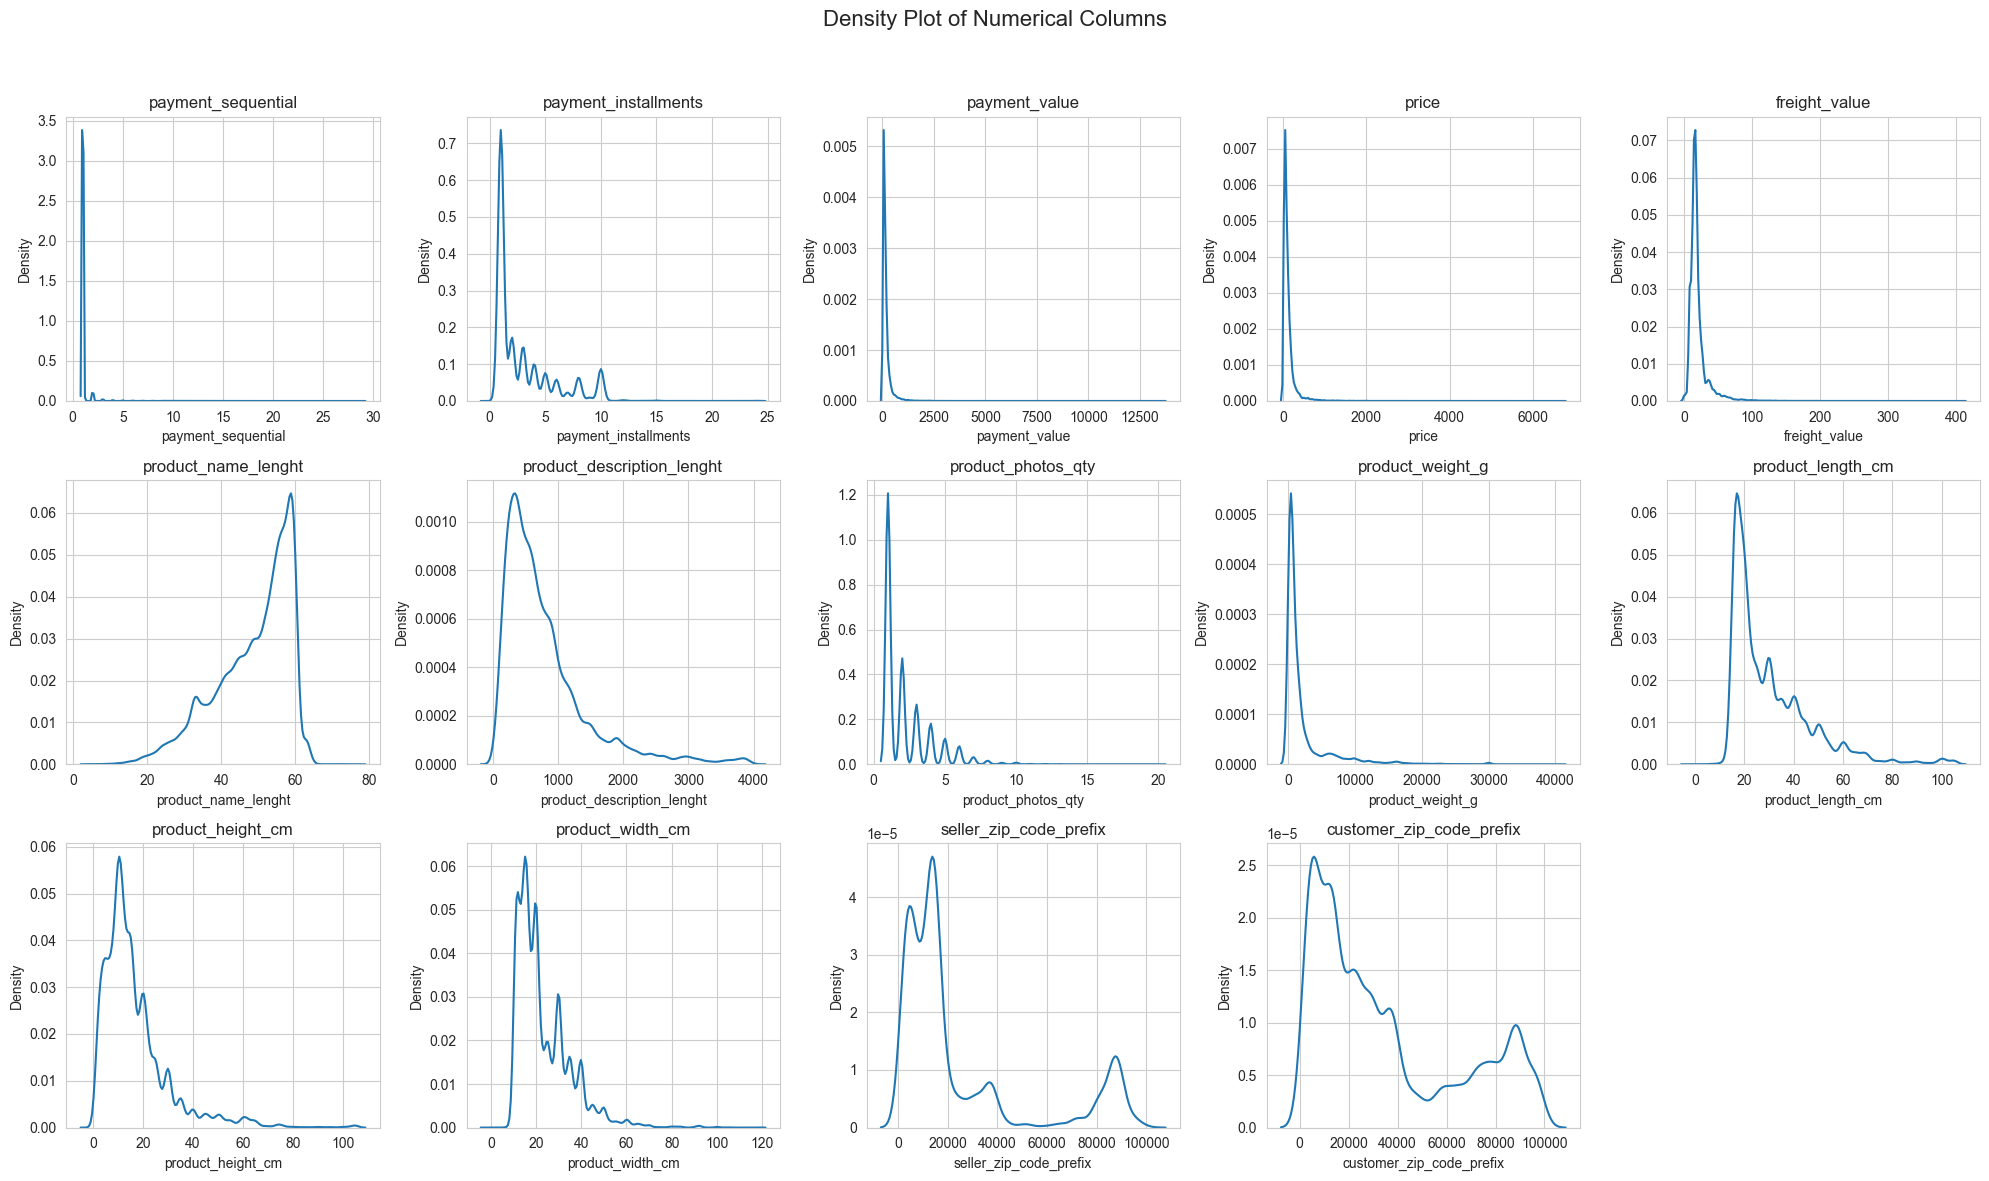

In [22]:
# Memilih kolom numerik
num_cols = merged_data.select_dtypes(include=np.number)

# Menentukan jumlah subplot
num_plots = len(num_cols.columns)
rows = 3  # Jumlah baris
cols = 5  # Jumlah kolom

fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
fig.suptitle('Density Plot of Numerical Columns', fontsize=16)

# Flatten axes untuk iterasi lebih mudah
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    sns.kdeplot(num_cols[col], ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12)

# Menghapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Menyesuaikan layout agar tidak bertumpuk dengan title
plt.show()


- Kode ini memilih semua kolom non-numerik dari dataset `merged_data`.
- Untuk setiap kolom non-numerik, kode menampilkan jumlah kemunculan setiap nilai unik dalam bentuk distribusi frekuensi.
- Output yang dihasilkan membantu memahami karakteristik data kategorikal, seperti status pesanan, jenis pembayaran, dan kategori produk.
- Misalnya, kolom `order_status` menunjukkan mayoritas pesanan berada dalam status `delivered`, yang berarti analisis lebih lanjut dapat difokuskan pada pesanan yang telah dikirim.
- Kolom `payment_type` menunjukkan bahwa mayoritas pembayaran dilakukan dengan kartu kredit (`credit_card`), yang dapat berimplikasi pada kebijakan bisnis terkait metode pembayaran.
- Data kota dan negara bagian (`customer_city`, `customer_state`) menunjukkan distribusi geografis pelanggan, yang bisa berguna untuk segmentasi pasar atau analisis logistik.


In [23]:
# Memilih semua kolom bertipe non-numerik dari dataset
cat_data = merged_data.select_dtypes(exclude=np.number)

# Melakukan iterasi pada setiap kolom non-numerik untuk melihat distribusi nilai uniknya
for col in cat_data:
    print(f'Column: {col}')
    print(cat_data[col].value_counts())  # Menampilkan jumlah kemunculan setiap nilai unik
    print('-' * 50)  # Menambahkan pemisah untuk keterbacaan output


Column: customer_id
customer_id
270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
d22f25a9fadfb1abbc2e29395b1239f4    24
                                    ..
6582b96a9add89bd4a5a7a6b5b9391b6     1
cc4b3ff0e95d7cb184dda30ab5e1e255     1
7cbcf7f49823f300c2309bb4344c0e61     1
5f3723cda88a7d6657c5a210014def9a     1
edb027a75a1449115f6b43211ae02a24     1
Name: count, Length: 97255, dtype: int64
--------------------------------------------------
Column: order_status
order_status
delivered      113384
shipped          1214
canceled          549
processing        362
invoiced          359
unavailable         7
approved            3
Name: count, dtype: int64
--------------------------------------------------
Column: order_purchase_timestamp
order_purchase_timestamp
2017-08-08 20:26:31    63
2017-09-23 14:56:45    38
2017-04-20 12:45:34    29
2017-06-07 12:05:10    26
2018-02-14 16:34:27 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola pembelian pelanggan berubah seiring waktu? Apakah terdapat tren musiman atau pola tertentu berdasarkan hari, bulan, atau tahun?


- **Tahun 1900 (Data Tidak Valid)**  
  - Ada data pembelian yang tercatat pada tahun 1900, yang kemungkinan merupakan kesalahan data atau nilai default dari sistem. Data ini perlu ditelusuri lebih lanjut dan kemungkinan harus dibersihkan atau dihapus.

- **Tahun 2016**  
  - Pembelian mulai terjadi di bulan Agustus dan meningkat di bulan September, dengan rentang harga yang lebih besar dibanding bulan lainnya.  
  - Beberapa transaksi terjadi pada bulan November dan Desember, namun sangat sedikit.  
  - Ini menunjukkan bahwa transaksi di tahun 2016 belum begitu banyak dan kemungkinan marketplace belum berkembang pesat.

- **Tahun 2017**  
  - Jumlah transaksi meningkat signifikan dibanding tahun 2016, dengan distribusi harga yang lebih stabil sepanjang tahun.  
  - Tidak ada bulan yang menonjol secara signifikan, yang menunjukkan bahwa pembelian cukup merata di setiap bulan.  
  - Outlier menunjukkan beberapa transaksi dengan harga tinggi terjadi sepanjang tahun.

- **Tahun 2018**  
  - Tren yang mirip dengan tahun 2017, tetapi volume transaksi tampaknya lebih tinggi.  
  - Tidak ada bulan yang menonjol dalam pola pembelian, meskipun terdapat sedikit peningkatan di bulan Desember, yang bisa dikaitkan dengan musim belanja akhir tahun.

- **Insight Keseluruhan**  
  - Tahun 2017 dan 2018 menunjukkan pola pembelian yang stabil setiap bulan, menandakan tidak adanya fluktuasi musiman yang signifikan.  
  - Tidak ada lonjakan besar di bulan tertentu seperti yang sering terjadi dalam event belanja besar (misalnya Black Friday atau Natal).  
  - Tahun 2016 menunjukkan pertumbuhan awal, sementara data tahun 1900 kemungkinan besar merupakan anomali yang perlu diperiksa lebih lanjut.


In [24]:
merged_data['month_purchased'] = merged_data['order_purchase_timestamp'].dt.month
merged_data['year_purchased'] = merged_data['order_approved_at'].dt.year

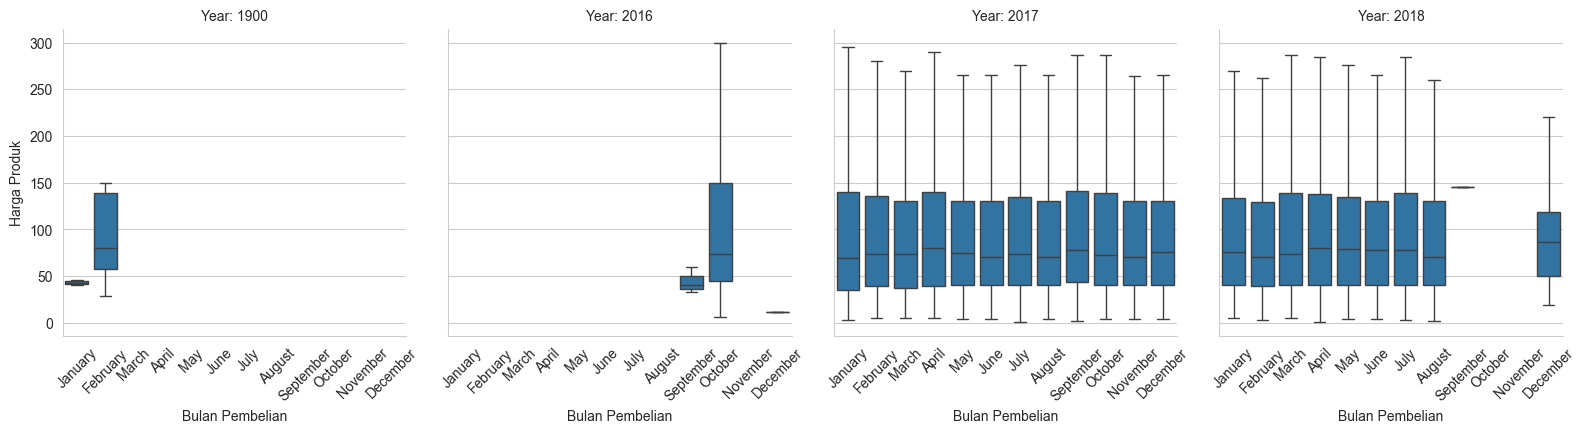

In [26]:
# Membuat urutan bulan (1-12) yang sesuai dengan nama bulan
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Mengonversi angka bulan menjadi nama bulan
merged_data["month_purchased"] = merged_data["month_purchased"].astype(int)  # Pastikan dalam bentuk integer
merged_data["month_purchased"] = merged_data["month_purchased"].map(lambda x: month_order[x - 1])  # Mapping angka ke nama bulan

# Membuat FacetGrid berdasarkan year_purchased
g = sns.FacetGrid(merged_data, col="year_purchased", height=4, sharey=True)

# Menambahkan boxplot dengan urutan bulan yang benar
g.map_dataframe(
    sns.boxplot, x="month_purchased", y="price", 
    order=month_order, showfliers=False  # Menentukan urutan bulan
)

# Menyesuaikan tampilan
g.set_axis_labels("Bulan Pembelian", "Harga Produk")
g.set_titles("Year: {col_name}")

# **FIX: Set axis ticks dengan cara yang benar**
for ax in g.axes.flat:
    ax.set_xticks(range(12))  # Tetapkan jumlah ticks ke 12 (untuk 12 bulan)
    ax.set_xticklabels(month_order, rotation=45)  # Atur nama bulan dan rotasi agar terbaca

# Menampilkan plot
plt.show()


### Pertanyaan 2: Apakah metode pembayaran memiliki pengaruh terhadap jumlah uang yang dibelanjakan pelanggan? Jika ya, metode pembayaran mana yang cenderung digunakan untuk transaksi dengan nilai lebih tinggi?

- **Distribusi Harga Berdasarkan Metode Pembayaran**  
  - **Credit Card** memiliki rentang harga transaksi yang paling luas, dengan beberapa transaksi bernilai tinggi. Ini menunjukkan bahwa metode ini sering digunakan untuk pembelian dengan harga tinggi.
  - **Boleto** dan **Voucher** memiliki distribusi harga yang lebih seragam, namun masih mencakup transaksi dengan harga yang cukup tinggi.
  - **Debit Card** memiliki rentang harga yang lebih sempit dibanding metode lainnya, dengan mayoritas transaksi berada dalam kisaran harga yang lebih rendah.

- **Kesimpulan**  
  - **Credit Card** adalah metode pembayaran yang paling sering digunakan untuk pembelian dengan nilai tinggi.
  - **Debit Card** cenderung digunakan untuk transaksi dengan harga lebih rendah.
  - **Boleto dan Voucher** memiliki distribusi harga yang lebih seimbang dibanding metode lainnya.
  - Perlu dilakukan analisis lebih lanjut apakah pelanggan yang menggunakan **Credit Card** memiliki kebiasaan belanja yang berbeda dibanding metode lain, misalnya dalam hal frekuensi atau kategori produk yang dibeli.


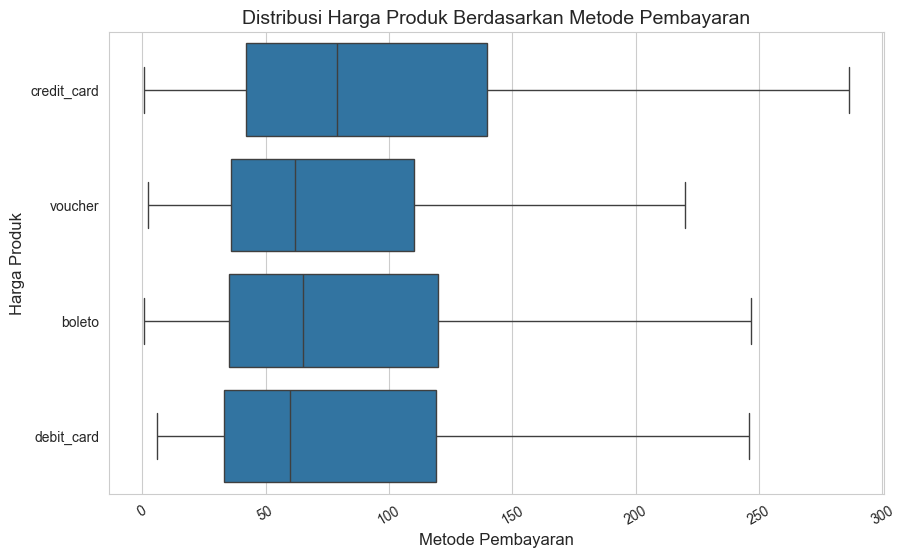

In [27]:
# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat boxplot untuk melihat distribusi harga berdasarkan metode pembayaran
sns.boxplot(
    data=merged_data, 
    x="price", 
    y="payment_type",
    showfliers=False,  # Menghilangkan outlier agar lebih mudah dibaca
)

# Menyesuaikan tampilan label
plt.xlabel("Metode Pembayaran", fontsize=12)
plt.ylabel("Harga Produk", fontsize=12)
plt.title("Distribusi Harga Produk Berdasarkan Metode Pembayaran", fontsize=14)

# Menampilkan plot
plt.xticks(rotation=30)  # Memiringkan label x agar tidak bertumpuk
plt.show()


## Conclusion

### **Kesimpulan Akhir**

- **Pola Pembelian Pelanggan Seiring Waktu**  
  - Tahun **2016** menunjukkan awal pertumbuhan marketplace dengan volume transaksi yang masih rendah.  
  - Tahun **2017 dan 2018** menunjukkan pola pembelian yang lebih stabil dan merata sepanjang tahun, tanpa adanya lonjakan besar di bulan tertentu.  
  - **Tidak ada indikasi tren musiman** yang signifikan seperti lonjakan di Black Friday atau Natal.  
  - Data tahun **1900 kemungkinan besar merupakan anomali** dan perlu ditangani dalam tahap preprocessing.

- **Pengaruh Metode Pembayaran terhadap Jumlah Uang yang Dibelanjakan**  
  - **Credit Card** digunakan untuk transaksi dengan nilai lebih tinggi dibanding metode lainnya.  
  - **Debit Card** cenderung digunakan untuk transaksi dengan harga lebih rendah.  
  - **Boleto dan Voucher** memiliki distribusi harga yang cukup seimbang dan tidak terlalu ekstrem.  
  - Perlu dilakukan **analisis lebih lanjut** terkait pola belanja pelanggan berdasarkan metode pembayaran, misalnya apakah pelanggan yang menggunakan Credit Card lebih loyal atau sering melakukan pembelian dengan harga tinggi.

- **Rekomendasi untuk Pengambilan Keputusan**  
  - Jika tujuan bisnis adalah **meningkatkan jumlah transaksi**, maka perlu dianalisis lebih lanjut mengapa tidak ada lonjakan di bulan tertentu dan apakah promosi musiman dapat meningkatkan penjualan.  
  - Jika ingin **mendorong transaksi dengan nilai lebih tinggi**, bisa difokuskan pada pelanggan yang menggunakan Credit Card, misalnya dengan memberikan program loyalitas atau cashback eksklusif.  
  - **Validasi data tahun 1900** diperlukan untuk memastikan analisis tidak terganggu oleh data anomali.

Dengan memahami pola pembelian pelanggan dan pengaruh metode pembayaran, bisnis dapat merancang strategi pemasaran yang lebih efektif untuk meningkatkan penjualan dan profitabilitas.
